# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [1]:
import numpy as np
from datascience import *
from IPython.display import YouTubeVideo

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Hypothesis Test Simulation: Smelling Parkinson's (Vaccinations Across the Nation)

In [2]:
yes_no_random_guess = make_array(0.50,0.50)

In [3]:
observed_parkinson = 11

In [6]:
#running one simulation of the experiment below 
12*sample_proportions(12,yes_no_random_guess).item(0)

7.0

In [7]:
num_simulations = 10000

In [8]:
simulated_statistics = make_array()

for i in np.arange(num_simulations):
    one_statistic = 12*sample_proportions(12,yes_no_random_guess).item(0)
    simulated_statistics = np.append(simulated_statistics, one_statistic)

In [9]:
simulated_statistics

array([  8.,  10.,   7., ...,   5.,   6.,   9.])

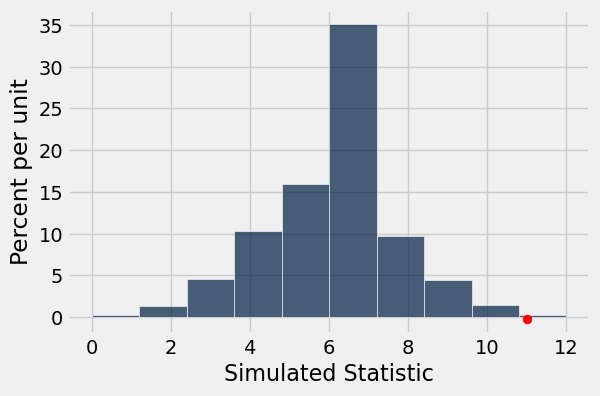

In [10]:
Table().with_columns('Simulated Statistic', simulated_statistics).hist()
plt.scatter(observed_parkinson, -0.002, color='red', s=40);

In [11]:
p_value = np.count_nonzero(simulated_statistics >= observed_parkinson) / num_simulations 
p_value

0.0032

## Let's look back at our coin flips

In [12]:
coin_flips = Table().read_table('Coin_Flips.csv')
coin_flips

Coin Flip
H
H
T
T
H
T
T
H
H
T


In [17]:
physically_simulated = make_array()
twelve_flips = make_array()

for i in np.arange(coin_flips.num_rows):
    flip_result = coin_flips.row(i).item('Coin Flip')
    twelve_flips = np.append(twelve_flips, flip_result)
    if len(twelve_flips)==12:
        num_heads_in_twelve = np.count_nonzero(twelve_flips == 'H')
        physically_simulated = np.append(physically_simulated,num_heads_in_twelve)
        #print(twelve_flips)
        twelve_flips = make_array()
twelve_flips

array(['T', 'H', 'H', 'H', 'T'],
      dtype='<U32')

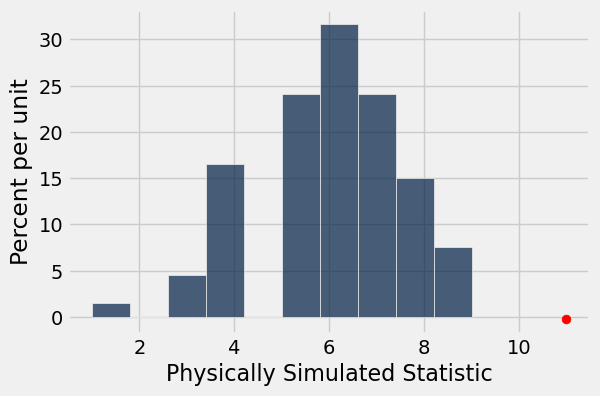

In [18]:
Table().with_columns('Physically Simulated Statistic', physically_simulated).hist()
plt.scatter(observed_parkinson, -0.002, color='red', s=40);

## Hypothesis Test Simulation: Comparing Distributions (Using TVD as a Test Statistic)

We are re-visitng the 'Swain v. Alabama' Supreme Court Case by investigating Jury representation a bit more locally. Consider the following study conducted by the American Civil Liberties Union of Northern California on [Jury representataion in Alameda County](https://www.aclunc.org/sites/default/files/racial_and_ethnic_disparities_in_alameda_county_jury_pools.pdf)

In [19]:
jury = Table().read_table('Jury_Alameda.csv')
jury

Ethnicity,Eligible,Panel
Asian / PI,0.15,0.26
Black / AA,0.18,0.08
Caucasian,0.54,0.54
Hispanic,0.12,0.08
Other,0.01,0.04


In [34]:
def total_variation_distance(distribution1, distribution2):
    return sum(np.abs(distribution1 - distribution2))

In [32]:
jury.column('Panel ')

array([ 0.26,  0.08,  0.54,  0.08,  0.04])

In [35]:
observed_tvd = total_variation_distance(jury.column('Eligible'),jury.column('Panel '))
observed_tvd

0.28000000000000003

In [36]:
sample_proportions( 500, jury.column('Eligible'))

array([ 0.136,  0.176,  0.522,  0.156,  0.01 ])

In [38]:
#for one simulation
simulated_tvd = total_variation_distance(sample_proportions( 500, jury.column('Eligible')),jury.column('Eligible'))
simulated_tvd

0.075999999999999887

In [39]:
simulated_tvds = make_array()

for i in np.arange(10000):
    sim_jury = sample_proportions( 500, jury.column('Eligible'))
    sim_tvd = total_variation_distance(sim_jury,jury.column('Eligible'))
    simulated_tvds = np.append(simulated_tvds,sim_tvd)

simulated_tvds

array([ 0.068,  0.064,  0.056, ...,  0.048,  0.092,  0.052])

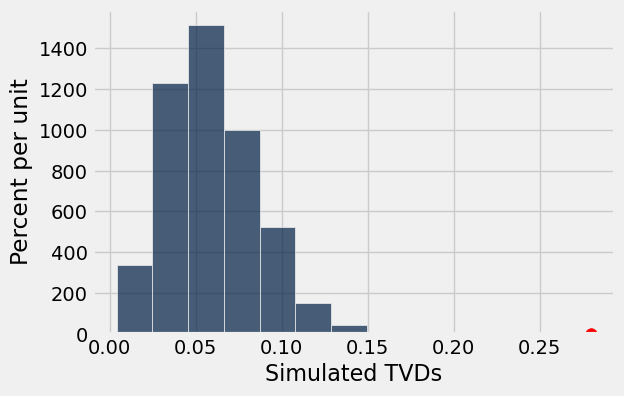

In [40]:
Table().with_column("Simulated TVDs", simulated_tvds).hist()
plt.scatter(observed_tvd, 0, color='red', s=70, zorder=2);
plt.show();

In [41]:
p_value_tvd = np.count_nonzero(simulated_tvds >= observed_tvd) / len(simulated_tvds) 
p_value_tvd

0.0

## Hypothesis Test Simulation: NBA rigged? (Who is Older? a.k.a. A/B Testing)

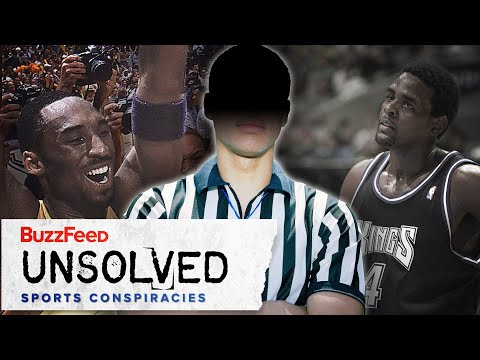

In [42]:
laker_fta = Table().read_table('LAL_2002_FTA_Table.csv')
#Claim starts around 3:05
YouTubeVideo("NU_QFMJD3z0")

In [44]:
laker_fta.show()

Opponent,Date,LAL FTA,Opp FTA,FTA Diff
NJN,6/12/2002,10,5,5
NJN,6/9/2002,14,3,11
NJN,6/7/2002,6,5,1
NJN,6/5/2002,25,10,15
SAC,6/2/2002,11,9,2
SAC,5/31/2002,27,9,18
SAC,5/28/2002,6,10,-4
SAC,5/26/2002,8,2,6
SAC,5/24/2002,8,16,-8
SAC,5/20/2002,16,10,6


In [47]:
def sac_or_notsac(opponent):
    if opponent == 'SAC':
        return opponent
    else:
        return 'Not SAC'
laker_fta = laker_fta.with_column('A/B Opp', laker_fta.apply(sac_or_notsac,'Opponent'))
laker_fta

Opponent,Date,LAL FTA,Opp FTA,FTA Diff,A/B Opp
NJN,6/12/2002,10,5,5,Not SAC
NJN,6/9/2002,14,3,11,Not SAC
NJN,6/7/2002,6,5,1,Not SAC
NJN,6/5/2002,25,10,15,Not SAC
SAC,6/2/2002,11,9,2,SAC
SAC,5/31/2002,27,9,18,SAC
SAC,5/28/2002,6,10,-4,SAC
SAC,5/26/2002,8,2,6,SAC
SAC,5/24/2002,8,16,-8,SAC
SAC,5/20/2002,16,10,6,SAC


In [46]:
observed_diff_ab = 18

In [52]:
shuffled_labels = laker_fta.sample(laker_fta.num_rows,with_replacement=False).column('A/B Opp')
laker_fta_shuffled = laker_fta.with_column('Shuffled Opp',shuffled_labels)
laker_fta_shuffled

Opponent,Date,LAL FTA,Opp FTA,FTA Diff,A/B Opp,Shuffled Opp
NJN,6/12/2002,10,5,5,Not SAC,Not SAC
NJN,6/9/2002,14,3,11,Not SAC,Not SAC
NJN,6/7/2002,6,5,1,Not SAC,SAC
NJN,6/5/2002,25,10,15,Not SAC,SAC
SAC,6/2/2002,11,9,2,SAC,Not SAC
SAC,5/31/2002,27,9,18,SAC,SAC
SAC,5/28/2002,6,10,-4,SAC,Not SAC
SAC,5/26/2002,8,2,6,SAC,SAC
SAC,5/24/2002,8,16,-8,SAC,SAC
SAC,5/20/2002,16,10,6,SAC,Not SAC


In [56]:
fta_group = laker_fta_shuffled.group('Shuffled Opp',np.average).select('Shuffled Opp','FTA Diff average')
fta_group

Shuffled Opp,FTA Diff average
Not SAC,2.41667
SAC,6.42857


In [57]:
fta_group.column('FTA Diff average').item(1) - fta_group.column('FTA Diff average').item(0)

4.011904761904763

In [59]:
simulated_statistics_ab = make_array()

repetitions = 10000

for i in np.arange(repetitions):
    shuffled_labels = laker_fta.sample(laker_fta.num_rows,with_replacement=False).column('A/B Opp')
    laker_fta_shuffled = laker_fta.with_column('Shuffled Opp',shuffled_labels)
    fta_group = laker_fta_shuffled.group('Shuffled Opp',np.average).select('Shuffled Opp','FTA Diff average')
    simulated_stat = fta_group.column('FTA Diff average').item(1) - fta_group.column('FTA Diff average').item(0)
    simulated_statistics_ab = np.append(simulated_statistics_ab,simulated_stat)
    
simulated_statistics_ab

array([ 2.42857143,  1.75      , -4.80952381, ..., -2.0952381 ,
        1.29761905,  0.8452381 ])

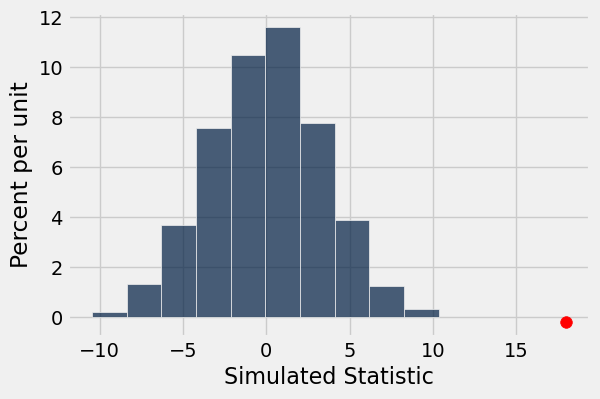

In [60]:
Table().with_columns('Simulated Statistic', simulated_statistics_ab).hist()
plt.scatter(observed_diff_ab, -0.002, color='red', s=70);

In [61]:
p_val = np.count_nonzero(simulated_statistics_ab >= observed_diff_ab) / repetitions
p_val

0.0